In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scaled_df=pd.read_csv('../data/processed/mall_customers_processed.csv')
scaled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


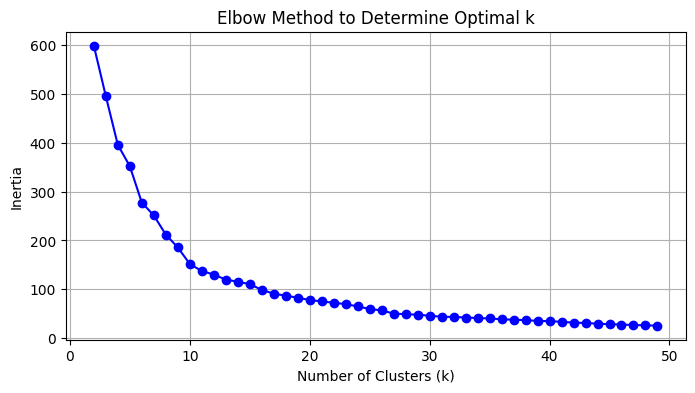

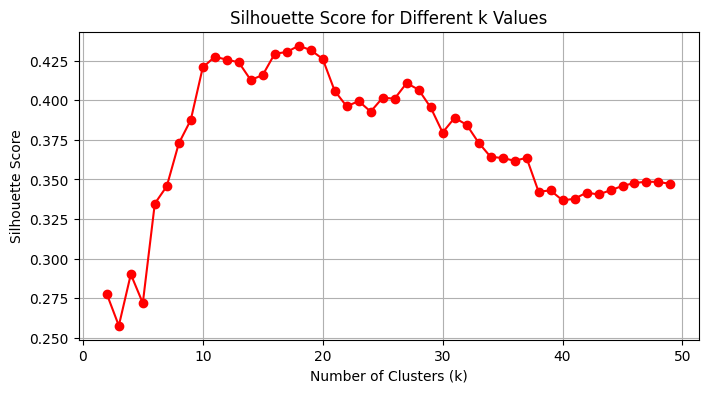

In [3]:
# Determining the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
score = []

K = range(2, 50)  # Start from k=2 for silhouette score

for k in K:
    kmeans = KMeans(n_clusters=k, tol=1e-9, random_state=42)
    clusters = kmeans.fit_predict(scaled_df)
    inertia.append(kmeans.inertia_)
    score.append(silhouette_score(scaled_df, clusters))

# Elbow Plot
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid()
plt.show()

# Silhouette Plot
plt.figure(figsize=(8, 4))
plt.plot(K, score, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid()
plt.show()

In [4]:
pd.DataFrame(score)

,0
0,0.277604
1,0.257620
2,0.290109
3,0.271910
4,0.334754
5,0.345740
6,0.372765
7,0.387615
8,0.420764
9,0.427507


In [5]:
# On analyzing the Silhouette Score plot, we can see that the score is highest at k=16 and the value is 
# 0.434. High value of silhouette score indicates that the clusters are well separated and distinct. So to improve the 
# silhouette score, we can try to dimensionality reduction techniques like PCA or t-SNE to reduce the number of features 
# and then apply clustering again.
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)
print(reduced_data)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-4.06382715e-01 -5.20713635e-01]
 [-1.42767287e+00 -3.67310199e-01]
 [ 5.07605706e-02 -1.89406774e+00]
 [-1.69451310e+00 -1.63190805e+00]
 [-3.13108383e-01 -1.81048272e+00]
 [-1.71744627e+00 -1.59926418e+00]
 [ 7.90821124e-01 -1.94727112e+00]
 [-2.14832159e+00 -1.50537369e+00]
 [ 2.77428623e+00 -8.82987672e-01]
 [-1.21629477e+00 -1.61640464e+00]
 [ 2.62905084e+00 -8.61237043e-01]
 [-1.68947038e+00 -1.54542784e+00]
 [ 1.68582253e+00 -2.02394479e+00]
 [-1.64607339e+00 -1.52251259e+00]
 [ 1.17443628e+00 -6.12790961e-01]
 [-1.32613070e+00 -2.36719149e-01]
 [ 1.67728253e-02 -1.74344572e+00]
 [-1.07842454e+00 -2.44715641e-01]
 [ 1.48758780e+00 -5.72676028e-01]
 [-1.66373169e+00 -1.43259774e+00]
 [ 4.88090311e-01 -3.92921145e-01]
 [-1.01895051e+00 -1.66247511e-01]
 [ 1.35891492e+00 -1.82866936e+00]
 [-7.22972722e-01 -1.81687017e-01]
 [ 1.51315931e+00 -1.76451196e+00]
 [-1.06241157e+00 -4.31150614e-02]
 [ 5.88832908e-01 -1.62541614e+00]
 [-2.06188227e-01 -1.71906970e-01]
 [ 3.68426440e-01 -1

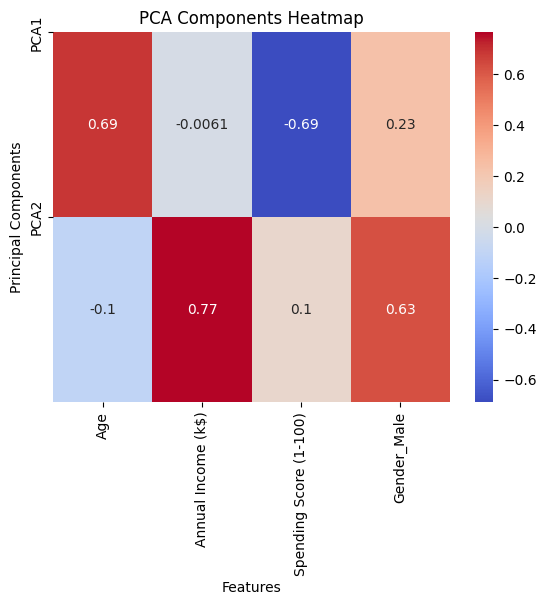

In [6]:
# Visualizing PCA Components with n_components=2
pca_df= pd.DataFrame(pca.components_, columns=scaled_df.columns)
plt.plot(figsize=(10, 6))
sns.heatmap(pca_df, annot=True, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('PCA Components Heatmap')
plt.yticks(ticks=[0, 1],labels=['PCA1', 'PCA2'])
plt.show()

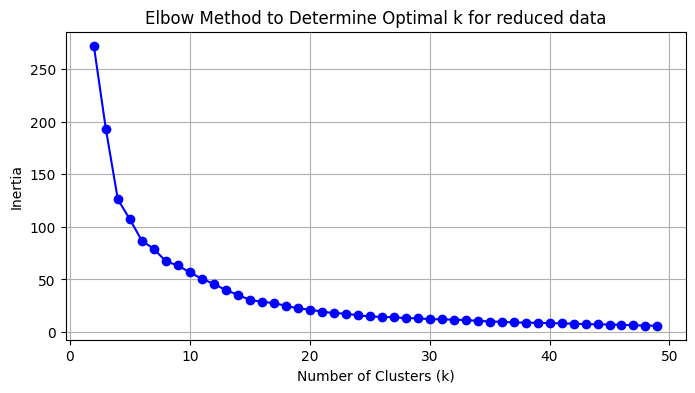

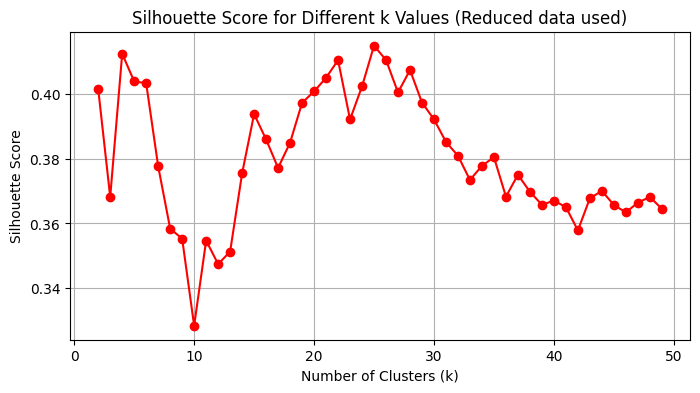

In [7]:
# Kmean clustering on the reduced data
# Determining the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
score = []

K = range(2, 50)  # Start from k=2 for silhouette score

for k in K:
    kmeans = KMeans(n_clusters=k, tol=1e-9, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)
    inertia.append(kmeans.inertia_)
    score.append(silhouette_score(reduced_data, clusters))

# Elbow Plot
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k for reduced data')
plt.grid()
plt.show()

# Silhouette Plot
plt.figure(figsize=(8, 4))
plt.plot(K, score, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values (Reduced data used)')
plt.grid()
plt.show()

In [8]:
print(f'Reduced data with two pca \n Maximum score: {max(score)} \n n_clusters: {score.index(max(score)) + 2}')  # +2 because K starts from 2

Reduced data with two pca 
 Maximum score: 0.4147675974096638 
 n_clusters: 25


In [9]:
# PCA with 3 components
pca = PCA(n_components=3)
reduced_data3 = pca.fit_transform(scaled_df)

print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.68790025 -0.00608217 -0.68691996  0.23430156]
 [-0.10368955  0.7652519   0.10321115  0.62688553]
 [-0.12238438 -0.64366712  0.13657317  0.74300906]]
[0.33690046 0.26230645 0.23260639]


In [10]:
print(reduced_data3)

[[-4.06382715e-01 -5.20713635e-01  2.07252663e+00]
 [-1.42767287e+00 -3.67310199e-01  2.27764369e+00]
 [ 5.07605706e-02 -1.89406774e+00  3.67375232e-01]
 [-1.69451310e+00 -1.63190805e+00  7.17466691e-01]
 [-3.13108383e-01 -1.81048272e+00  4.26459924e-01]
 [-1.71744627e+00 -1.59926418e+00  6.96379423e-01]
 [ 7.90821124e-01 -1.94727112e+00  1.86491593e-01]
 [-2.14832159e+00 -1.50537369e+00  7.58463596e-01]
 [ 2.77428623e+00 -8.82987672e-01  1.38814112e+00]
 [-1.21629477e+00 -1.61640464e+00  5.55769702e-01]
 [ 2.62905084e+00 -8.61237043e-01  1.42011358e+00]
 [-1.68947038e+00 -1.54542784e+00  6.55007647e-01]
 [ 1.68582253e+00 -2.02394479e+00 -1.69391673e-02]
 [-1.64607339e+00 -1.52251259e+00  6.10409943e-01]
 [ 1.17443628e+00 -6.12790961e-01  1.65373684e+00]
 [-1.32613070e+00 -2.36719149e-01  2.13541457e+00]
 [ 1.67728253e-02 -1.74344572e+00  2.66543893e-01]
 [-1.07842454e+00 -2.44715641e-01  2.05948662e+00]
 [ 1.48758780e+00 -5.72676028e-01  1.53311653e+00]
 [-1.66373169e+00 -1.43259774e+

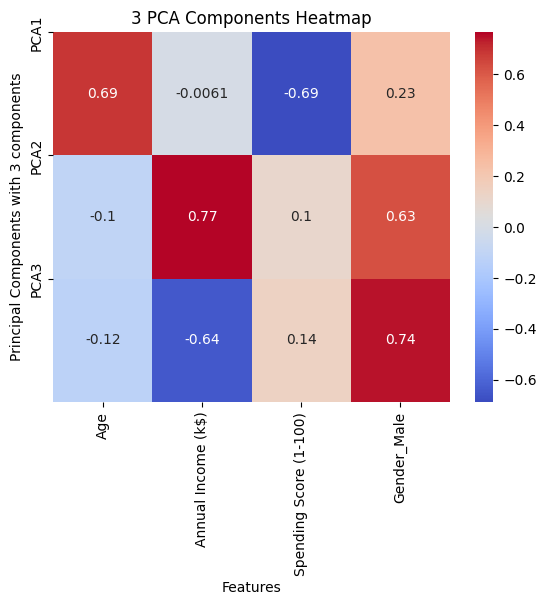

In [11]:
# Visualizing PCA Components with n_components=3
pca3_df= pd.DataFrame(pca.components_, columns=scaled_df.columns)
plt.plot(figsize=(10, 6))
sns.heatmap(pca3_df, annot=True, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Principal Components with 3 components')
plt.title('3 PCA Components Heatmap')
plt.yticks(ticks=[0, 1, 2],labels=['PCA1', 'PCA2', 'PCA3'])
plt.show()

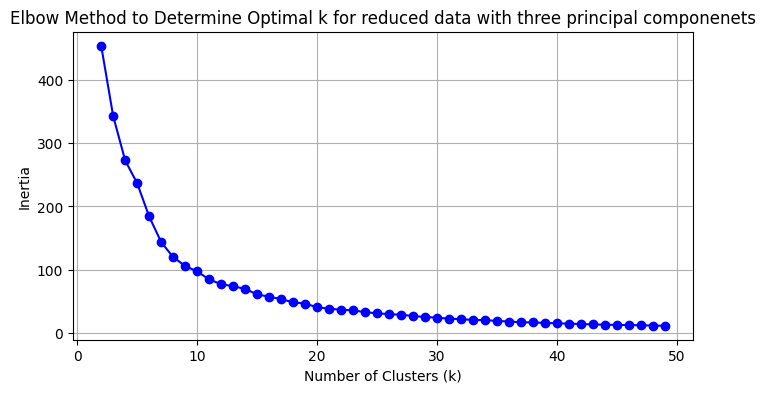

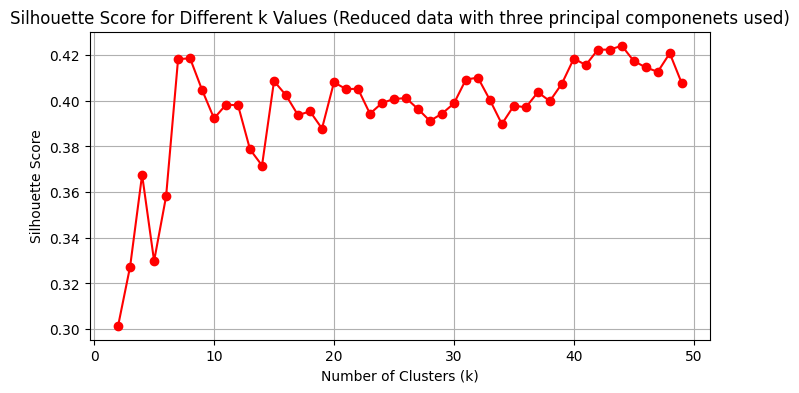

In [12]:
# Kmean clustering on the reduced data with 3 components
# Determining the optimal number of clusters using the Elbow Method and Silhouette Score
inertia = []
score = []

K = range(2, 50)  # Start from k=2 for silhouette score

for k in K:
    kmeans = KMeans(n_clusters=k, tol=1e-9, random_state=42)
    clusters = kmeans.fit_predict(reduced_data3)
    inertia.append(kmeans.inertia_)
    score.append(silhouette_score(reduced_data3, clusters))

# Elbow Plot
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k for reduced data with three principal componenets')
plt.grid()
plt.show()

# Silhouette Plot
plt.figure(figsize=(8, 4))
plt.plot(K, score, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values (Reduced data with three principal componenets used)')
plt.grid()
plt.show()

In [14]:
print(f'Reduced data with three pca \n Maximum score: {max(score)} \n n_clusters: {score.index(max(score)) + 2}')  # +2 because K starts from 2

Reduced data with three pca 
 Maximum score: 0.42408098798841976 
 n_clusters: 44
